# Time series manipulation

The objective here is to create and manipulate a time series. A time series is a particular field where the mesh $\mathcal{M}$ 1-d and regular, eg a time grid $(t_0, \dots, t_{N-1})$.

It is possible to draw a time series, using interpolation between the values: see the use case on the Field.

A time series can be obtained as a realization of a multivariate stochastic process  $X: \Omega \times [0,T] \rightarrow \mathbb{R}^d$   of dimension $d$ where $[0,T]$ is discretized according to the regular grid $(t_0, \dots, t_{N-1})$ . The  values $(\underline{x}_0, \dots, \underline{x}_{N-1})$ of the  time series are defined by:
$$  \forall i \in [0, N-1],\quad \underline{x}_i= X(\omega)(t_i) $$


A time series is stored in the **TimeSeries** object that stores the regular time grid and the associated values.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Create the RegularGrid
tMin = 0.
timeStep = 0.1
N = 100
myTimeGrid = ot.RegularGrid(tMin, timeStep, N)

In [15]:
# Case 1: Create a time series from a time grid and values
# Care! The number of steps of the time grid must correspond to the size of the values
myValues = ot.Normal(3).getSample(myTimeGrid.getVertices().getSize())
myTimeSeries = ot.TimeSeries(myTimeGrid, myValues)
myTimeSeries

class=TimeSeries name=Unnamed derived from=class=FieldImplementation name=Unnamed mesh=class=Mesh name=Unnamed dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=class=Sample name=Normal implementation=class=SampleImplementation name=Normal size=100 dimension=3 description=[X0,X1,X2] data=[[2.31733,-0.469879,-0.801703],[-0.0108486,-0.0553915,-1.7548],[-0.894538,-0.360249,-0.770978],[0.55883,1.62925,1.34049],[0.494815,-0.0180664,-0.0365295],[-1.01369,1.03588,-0.12276],[-0.177026,1.4058,0.0981434],[1.01776,0.833219,2.12309],[-1.65891,1.91107,-0.499354],[-0.707992,-0.836693,-0.08448],[-0.0772068,-0.754153,1.35719],[-0.262538,0.43282,-1.88328],[1.1694,-0.0711754,-1.57923],[1.07961,0.818312,-0.769237],[-1.63959,-2.49198,0.392813],[1.54502,-0.592087,2.36899],[-0.81979,-0.103824,-0.98551],[0.987314,-0.346144,-1.34504],[1.07011,0.927288,-0.155148],[-0.461614,1.68461,0.712465],[0.929992,-0.483778,-0.174459],[0.662006,-0.698763,-0.0269453],[-1.28184,0.386923,0.152988],[-0.467685,-0.514194,0.384462],[0.261137,-0.578211,-1.33245],[0.864973,0.941687,0.329529],[0.0412185,0.141166,-0.0393573],[0.27118,-0.383442,0.760954],[0.0351336,-0.295452,0.13985],[-0.863809,1.23659,1.40946],[0.681355,-0.220565,1.25437],[-0.583736,-1.26391,-0.235933],[-0.633479,2.00508,-1.06159],[-0.973466,0.182045,0.466031],[-2.404,-0.675804,-0.43258],[0.615584,0.946263,0.254775],[-0.173574,0.741881,-0.0834884],[-1.23036,-1.46178,-0.519229],[1.90887,-1.15193,1.02327],[0.169987,-0.0977635,-0.423342],[-0.638673,-0.260154,-1.43577],[1.15734,-1.18448,-0.242118],[-1.75983,0.224354,-0.497826],[0.894821,0.595231,-0.248979],[0.0926772,-0.824599,0.824924],[-1.64514,-0.313514,1.07257],[-0.281387,1.01541,-0.343512],[1.73504,-1.54906,-0.570394],[-0.634918,0.397189,-0.45656],[-0.853559,0.0403166,-0.299548],[0.450826,0.0339842,-0.428601],[0.877138,0.262852,0.269669],[-0.86813,-0.323261,-0.719086],[-1.67268,-0.0197131,-1.12035],[-0.597611,-0.330729,-0.0366483],[-0.0950169,0.912443,1.13421],[0.159206,-0.617572,1.47189],[1.41735,-0.150357,-0.463105],[-1.24986,-1.85139,1.21562],[-0.383809,-0.135983,-0.966214],[3.0788,-0.710827,-0.216468],[-0.226418,0.0258637,0.921209],[0.0419902,0.103587,0.249475],[-0.667934,0.12365,-0.14698],[-0.271669,0.485002,0.201355],[-0.259562,0.00503527,-1.99632],[-0.735897,0.244483,-1.93819],[0.553995,-0.879113,1.10496],[0.533898,0.043558,-0.593256],[0.955203,1.44755,-0.420213],[-1.02309,-0.567824,-0.632136],[-0.671702,-0.562391,0.0522118],[0.567886,-0.804104,-1.0274],[0.0207672,1.36971,0.726692],[1.2459,1.99545,-0.41103],[0.

In [4]:
# Case 2: Get a time series from a Process
myProcess = ot.WhiteNoise(ot.Normal(3), myTimeGrid)
myTimeSeries2 = myProcess.getRealization()
myTimeSeries2

class=Field name=Unnamed description=[t,X0,X1,X2] implementation=class=FieldImplementation name=Unnamed mesh=class=Mesh name=Unnamed dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=class=Sample name=Normal implementation=class=SampleImplementation name=Normal size=100 dimension=3 description=[X0,X1,X2] data=[[1.73945,0.935939,1.27511],[-0.595004,-0.0230083,1.85337],[0.356188,-1.31765,-1.195],[-0.443684,-0.826204,-0.748816],[0.434034,-0.644208,-0.559902],[0.0546682,-0.0564792,0.757535],[-0.663158,0.683646,0.591043],[-2.20872,-0.779031,-0.703086],[-0.0566955,0.588101,0.738839],[0.727128,-1.1831,0.853199],[1.03198,0.104467,0.51551],[-1.73251,0.369231,0.667104],[-0.51281,-0.477754,1.26264],[1.57846,1.89005,0.390297],[0.235759,0.244948,0.57169],[-0.420542,0.553255,-2.19382],[0.421279,0.753758,-0.512419],[-0.306225,-1.21103,0.0174802],[-1.16501,0.0643894,0.717609],[-0.304268,-0.391375,0.258215],[-1.49078,1.06182,0.374969],[-0.165467,0.357871,0.885118],[1.7379,-0.713196,1.70642],[0.428636,-0.277595,0.411295],[0.370445,0.187854,1.43266],[-0.416128,-0.122868,0.950488],[-0.411128,-0.98049,0.564196],[-1.55666,0.624888,1.05797],[-0.769529,1.54237,0.374802],[0.506105,0.419768,1.58128],[0.00956375,-0.38302,0.163699],[1.2561,0.00620397,0.272004],[-0.153784,-0.404166,2.09224],[0.675043,-0.383208,-0.355239],[-1.3053,-1.51577,0.172158],[0.57768,-0.173049,0.662172],[0.697838,0.789578,0.479307],[-0.449433,1.7657,0.281658],[0.127981,-0.747966,0.512891],[1.08613,-0.551952,1.57891],[-0.222394,0.205503,1.33851],[0.045253,2.15649,1.00985],[1.18898,1.28765,-0.279847],[-0.567342,0.0789431,-0.374098],[0.36891,-0.216249,-0.964493],[1.14255,0.271953,-0.62676],[-1.24554,-0.793869,0.808652],[0.551898,1.26214,-0.398731],[-2.13505,0.420672,-0.164956],[-1.27789,-0.748335,0.447628],[1.6065,-1.23832,-0.857113],[-0.796012,2.55533,-1.40966],[0.161757,1.07153,-0.0756152],[-0.38581,-0.695899,-0.240171],[0.0140339,-1.32783,-0.421805],[-1.31457,-0.314242,0.870097],[-1.05029,-0.661749,-0.398957],[-0.306869,2.24097,-1.84225],[-1.12629,-0.343091,1.35707],[-1.14144,0.719911,0.691288],[0.0157415,0.897854,-0.0268917],[-1.17253,-1.22323,1.33729],[-0.412087,1.40508,0.839941],[-0.171826,-0.612136,0.43319],[1.25989,-2.15135,0.638385],[1.1986,0.576051,-2.72106],[-0.456634,0.834452,0.189723],[-1.5599,0.141706,-0.312877],[-1.09669,1.30628,-0.603543],[0.0844715,-1.01157,-0.45413],[0.184323,1.11103,0.0332655],[-0.402727,0.812135,0.137958],[-0.552396,0.712298,0.657798],[-0.2971,0.288142,-0.843501],[1.4814,0.904859,0.90054],[0.211378,0.408217,-

In [5]:
# Get the number of values of the time series
myTimeSeries.getSize()

100

In [6]:
# Get the dimension of the values observed at each time
myTimeSeries.getMesh().getDimension()

1

In [7]:
# Get the value Xi at index i
i = 37
print('Xi = ', myTimeSeries.getValueAtIndex(i))

Xi =  [-0.488205,-0.465482,0.332084]


In [8]:
# Get the time series at index i : (ti, Xi)
i = 37
print('(ti, Xi) = ', myTimeSeries[i])

(ti, Xi) =  [-0.488205,-0.465482,0.332084]


In [9]:
# Get a the marginal value at index i of the time series
i = 37
# get the time stamp:
print('ti = ', myTimeSeries[i, 0])
# get the first component of the corresponding value :
print('Xi1 = ', myTimeSeries[i, 1])

ti =  -0.4882047479037244
Xi1 =  -0.46548206392049335


In [10]:
# Get all the values (X1, .., Xn) of the time series
myTimeSeries.getValues()

class=Sample name=Normal implementation=class=SampleImplementation name=Normal size=100 dimension=3 description=[X0,X1,X2] data=[[0.608202,-1.26617,-0.438266],[1.20548,-2.18139,0.350042],[-0.355007,1.43725,0.810668],[0.793156,-0.470526,0.261018],[-2.29006,-1.28289,-1.31178],[-0.0907838,0.995793,-0.139453],[-0.560206,0.44549,0.322925],[0.445785,-1.03808,-0.856712],[0.473617,-0.125498,0.351418],[1.78236,0.0702074,-0.781366],[-0.721533,-0.241223,-1.78796],[0.40136,1.36783,1.00434],[0.741548,-0.0436123,0.539345],[0.29995,0.407717,-0.485112],[-0.382992,-0.752817,0.257926],[1.96876,-0.671291,1.85579],[0.0521593,0.790446,0.716353],[-0.743622,0.184356,-1.53073],[0.655027,0.538071,1.73821],[-0.958722,0.377922,-0.181004],[1.67297,-1.03896,-0.353552],[1.21381,-0.777033,-1.36853],[0.103474,-0.89182,0.905602],[0.334794,-0.483642,0.677958],[1.70938,1.07062,-0.506925],[-1.66086,2.24623,0.759602],[-0.510764,-0.633066,-0.957072],[0.544047,0.814561,-0.734708],[-0.111461,0.994482,-0.160625],[-0.938771,-1.96869,-0.657603],[0.338751,1.01556,0.637167],[-0.0899071,-0.855886,1.27128],[-0.238253,1.3263,2.11968],[-0.901581,-1.51696,-1.29938],[0.230372,-3.09737,0.01323],[-1.25743,1.02776,-0.766431],[0.217512,1.04533,0.331569],[-0.488205,-0.465482,0.332084],[-0.167726,3.01263,0.94204],[0.61189,0.611715,-1.5375],[-2.4067,0.662936,-0.65616],[-0.751611,0.438177,-0.455335],[1.86038,0.219721,1.72546],[-0.543405,-0.736749,-0.508206],[-2.25867,-0.5964,-0.31468],[-1.78274,-0.684734,0.0611157],[0.87372,-1.46295,-0.318786],[1.26314,-0.426726,-1.89234],[-0.514391,0.647229,0.00370249],[0.729688,-0.247234,0.479191],[-0.0336098,-0.0367271,0.110256],[-0.37687,-0.0955894,0.109122],[-0.198754,0.47362,0.161637],[0.384483,0.116468,-0.10008],[1.49156,1.22301,0.526646],[-0.656923,-0.131228,-1.45347],[1.17414,0.929395,-0.337113],[0.578688,-0.582459,-1.38886],[-0.499748,-1.55516,0.483083],[0.205004,-0.0972525,0.592563],[-0.602044,-1.21009,-0.886698],[-0.141114,0.441983,0.519162],[-1.51455,-0.676917,0.667678],[-1.40585,-0.0295335,-0.631829],[-0.342157,2.05339,1.1587],[-1.45717,-0.844367,-0.28861],[0.419271,-0.836064,0.858269],[-0.906566,-0.91681,1.16322],[0.301918,0.490331,0.475425],[-0.788704,-0.669449,-0.137928],[-0.971531,-1.18784,1.4282],[-0.58923,-1.73218,0.824993],[3.02799,1.6948,-1.64827],[-0.996469,0.773121,-0.519476],[-0.0351973,-0.439866,-0.259332],[-0.875419,-2.53986,-0.0566709],[-0.0217279,0.59922,0.146868],[-0.74536,-0.521596,0.59202],[-0.470039,-2.17211,-0.432617],[0.26775,-0.36799,1.14842],[-0.0343283,0.461082,-0.622424],[-1.62506,-0.543099,-0.269535],[0.0208818,0.623854,0.767137],[0.888798,1.48031,0.661002],[1.40895,0.576125,1.89326],[0.858611,-0.907348,-0.537503],[-0.638434,1.34856,-2.26608],[0.423232,-0.996141,-1.08751],[0.11108,0.677663,-1.05502],[-0.00409659,0.562833,-0.029616],[0.0702065,-0.23527,-1.29031],[-1.01864,-1.71131,0.943326],[-0.542319,-0.999111,-1.40457],[1.94606,0.779572,1.13848],[0.711148,-0.453386,0.618319],[0.722044,0.660021,0.465919],[-0.40773,1.45919,-0.411565],[0.549439,1.45019,-0.327249],[-1.39796,1.30115,-0.485259],[-0.272407,-0.338823,-0.790757]]

In [11]:
# Compute the temporal Mean
# It corresponds to the mean of the values of the time series
myTimeSeries.getInputMean()

class=Point name=Unnamed dimension=3 values=[-0.025392,-0.027327,-0.0146978]

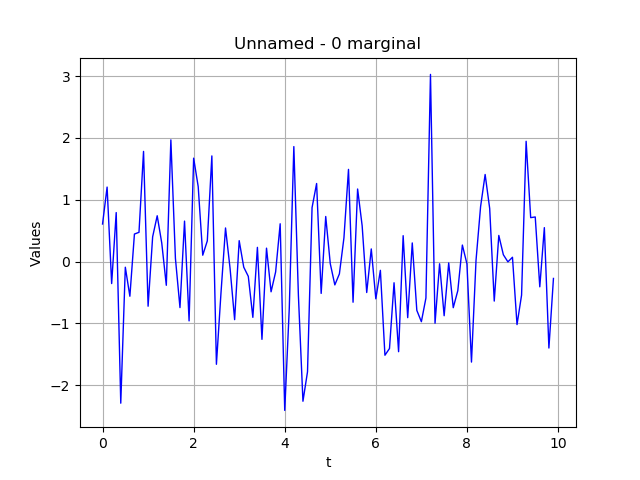

In [12]:
# Draw the marginal i of the time series using linear interpolation
myTimeSeries.drawMarginal(0)

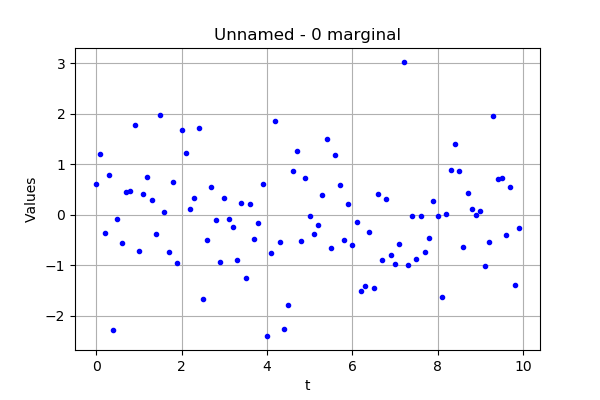

In [13]:
# with no interpolation
myTimeSeries.drawMarginal(0, False)